## Linking Data

What we did in the Exploring Data and Exploring Maps notebooks doesn't yet give us the feeling of being able to *do* useful things!  For that to happen we need to be able to link the tabular data to the geodata to create a choropleth map.

In [67]:
import geopandas as gpd
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt

src_dir = Path.home() / Path('work/data/clean')

In [105]:
jp  = gpd.read_parquet(src_dir / 'Jaipur_Boundary.geoparquet')
df  = pd.read_parquet(src_dir / 'ward_population.parquet')
#gdf = gpd.read_parquet(src_dir / 'Jaipur_Wards.geoparquet')
gdf = gpd.read_file(src_dir / 'Merged Jaipur Wards.gpkg')

There are 251 rows.
The columns are: Id, AREA, Ward_No, POP, DENS_PPH, NAME, Ward_Numbe, layer, path, geometry


<Axes: >

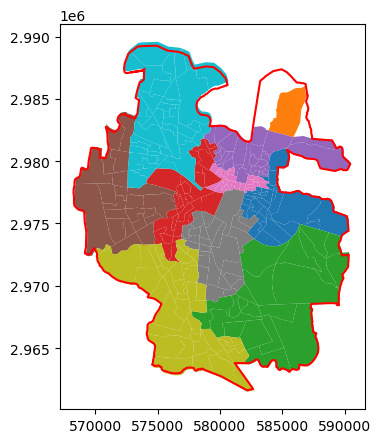

In [106]:
print(f"There are {gdf.shape[0]} rows.")
print(f"The columns are: {', '.join(gdf.columns.to_list())}")
f, ax = plt.subplots(1,1,figsize=(5,5))
gdf.plot(column='NAME', ax=ax)
jp.plot(color='red', ax=ax)

In [107]:
gdf['Ward'] = gdf['Ward_No'].fillna(gdf['Ward_Numbe'])

In [108]:
gdf.Ward.value_counts()

Ward
77.0     3
40.0     3
99.0     2
7.0      2
25.0     2
        ..
106.0    1
104.0    1
114.0    1
131.0    1
102.0    1
Name: count, Length: 150, dtype: int64

In [109]:
df.head()

,State,District,Subdistt,Town/Village,Ward,EB,Level,Name,TRU,No_HH,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,8,110,0,0,0,0,DISTRICT,Jaipur,Total,1177096,...,6775,4002,1405,2597,32114,13016,19098,4161285,1753560,2407725
1,8,110,0,0,0,0,DISTRICT,Jaipur,Rural,507803,...,6053,2390,746,1644,22425,7181,15244,1807672,855473,952199
2,8,110,0,0,0,0,DISTRICT,Jaipur,Urban,669293,...,722,1612,659,953,9689,5835,3854,2353613,898087,1455526
3,8,110,538,0,0,0,SUB-DISTRICT,Kotputli,Total,69470,...,1092,120,43,77,1533,710,823,250857,117413,133444
4,8,110,538,0,0,0,SUB-DISTRICT,Kotputli,Rural,61396,...,1037,110,36,74,1398,600,798,215446,102706,112740


In [110]:
df.Ward.value_counts()

Ward
0     2244
1       19
9       11
15      11
13      11
      ... 
48       1
49       1
50       1
51       1
77       1
Name: count, Length: 78, dtype: int64

<Axes: >

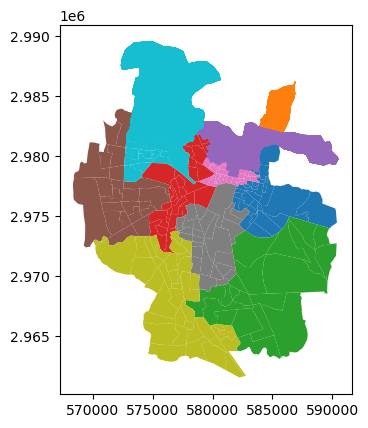

In [111]:
ward_gdf = gdf.set_index('Ward').join(df.set_index('Ward'), how='left')
ward_gdf.plot(column='NAME', linewidth=2)

<Axes: >

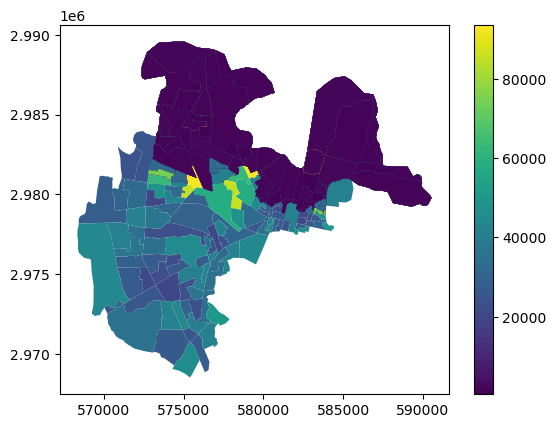

In [117]:
ward_gdf.plot(column='TOT_P', cmap='viridis', legend=True)

In [136]:
ward_gdf[ward_gdf.TOT_P>5000][['Ward_No','Ward_Numbe','POP','TOT_P']]

,Ward_No,Ward_Numbe,POP,TOT_P
Ward,,,,
76.0,76.0,NaN,14120,41030.0
77.0,77.0,NaN,13879,50030.0
77.0,77.0,NaN,0,50030.0
2.0,2.0,NaN,14410,65260.0
1.0,1.0,NaN,12453,20287.0
...,...,...,...,...
38.0,NaN,38.0,11607,29333.0
39.0,NaN,39.0,12154,20386.0
40.0,NaN,40.0,11353,41989.0


In [132]:
ward_gdf[ward_gdf.TOT_P<5000]

,Id,AREA,Ward_No,POP,DENS_PPH,NAME,Ward_Numbe,layer,path,geometry,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
Ward,,,,,,,,,,,,,,,,,,,,,
2.0,0,755,2.0,14410,19,AMER,NaN,Amer_Assembly,/Users/jreades/Documents/git/jaipur/data/src/J...,"MULTIPOLYGON (((586925.612 2986153.121, 586854...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1173.0,593.0,580.0
2.0,0,755,2.0,14410,19,AMER,NaN,Amer_Assembly,/Users/jreades/Documents/git/jaipur/data/src/J...,"MULTIPOLYGON (((586925.612 2986153.121, 586854...",...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,738.0,284.0,454.0
2.0,0,755,2.0,14410,19,AMER,NaN,Amer_Assembly,/Users/jreades/Documents/git/jaipur/data/src/J...,"MULTIPOLYGON (((586925.612 2986153.121, 586854...",...,5.0,1.0,0.0,1.0,1.0,0.0,1.0,930.0,424.0,506.0
2.0,0,755,2.0,14410,19,AMER,NaN,Amer_Assembly,/Users/jreades/Documents/git/jaipur/data/src/J...,"MULTIPOLYGON (((586925.612 2986153.121, 586854...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1366.0,608.0,758.0
2.0,0,755,2.0,14410,19,AMER,NaN,Amer_Assembly,/Users/jreades/Documents/git/jaipur/data/src/J...,"MULTIPOLYGON (((586925.612 2986153.121, 586854...",...,4.0,0.0,0.0,0.0,8.0,3.0,5.0,807.0,329.0,478.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.0,0,477,NaN,11096,23,VIDHYADHAR NAGAR,2.0,VidyadharNgr_Assembly,/Users/jreades/Documents/git/jaipur/data/src/J...,"MULTIPOLYGON (((572694.186 2988892.108, 574011...",...,0.0,1.0,0.0,1.0,35.0,24.0,11.0,704.0,254.0,450.0
2.0,0,477,NaN,11096,23,VIDHYADHAR NAGAR,2.0,VidyadharNgr_Assembly,/Users/jreades/Documents/git/jaipur/data/src/J...,"MULTIPOLYGON (((572694.186 2988892.108, 574011...",...,0.0,0.0,0.0,0.0,6.0,5.0,1.0,1077.0,397.0,680.0
2.0,0,477,NaN,11096,23,VIDHYADHAR NAGAR,2.0,VidyadharNgr_Assembly,/Users/jreades/Documents/git/jaipur/data/src/J...,"MULTIPOLYGON (((572694.186 2988892.108, 574011...",...,5.0,0.0,0.0,0.0,7.0,5.0,2.0,661.0,264.0,397.0


<Axes: >

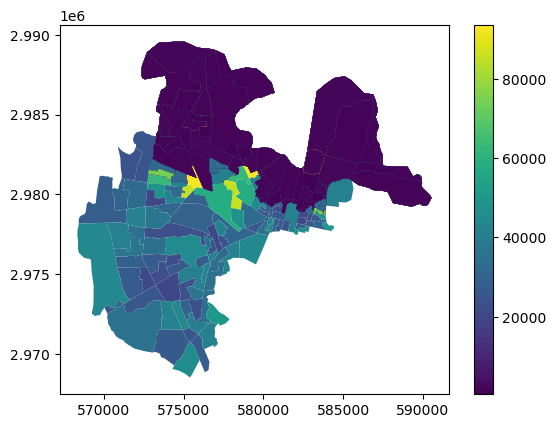

In [131]:
ward_gdf[ward_gdf.TOT_P>5000].plot(column='TOT_P', cmap='viridis', legend=True)

<Axes: >

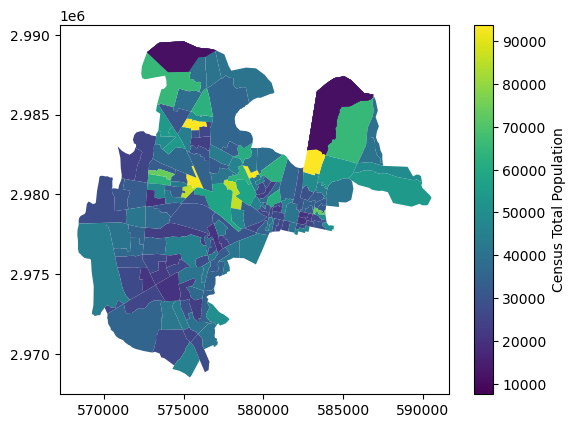

In [123]:
ward_gdf[ward_gdf.TOT_P>5000].plot(column='TOT_P', cmap='viridis', legend=True, legend_kwds={"label": "Census Total Population"})

<Axes: >

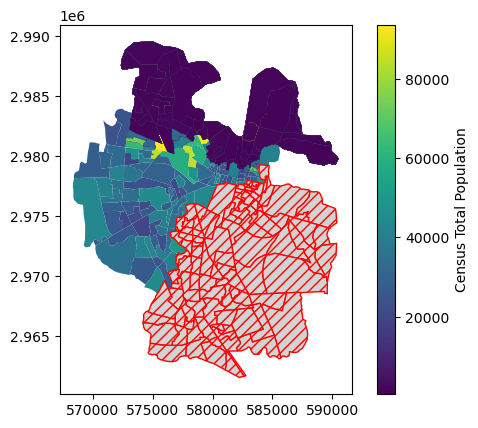

In [130]:
ward_gdf.plot(
    column='TOT_P', 
    cmap='viridis', 
    legend=True, 
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    }, 
    legend_kwds={"label": "Census Total Population"})